In [1]:
#Adding path to parent directory
import numpy as np
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#Loading black box utilities
from ur_evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_diabetes_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical featues = {len(categorical_features)}")

print('X_test', X_test[1])
print('y_test', y_test)

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score for the model on test set = -0.12696573785024534
Prediction model type = regression
Number of categorical featues = 0
X_test [-0.01277963 -0.04464164 -0.06548562 -0.06994845  0.00118295  0.01684873
 -0.00290283 -0.0070204  -0.03074792 -0.05078298]
y_test [ 42.  96. 243.  65. 104.  47. 200. 175. 104. 168. 141.  94.  63.  53.
  83.  89.  42. 182. 196. 118. 110. 219. 109.  78. 249. 184. 131. 150.
  97. 264. 332. 283.  99. 116.  70.  55. 144.  51. 156. 187. 196. 121.
 128. 103. 109.]


C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


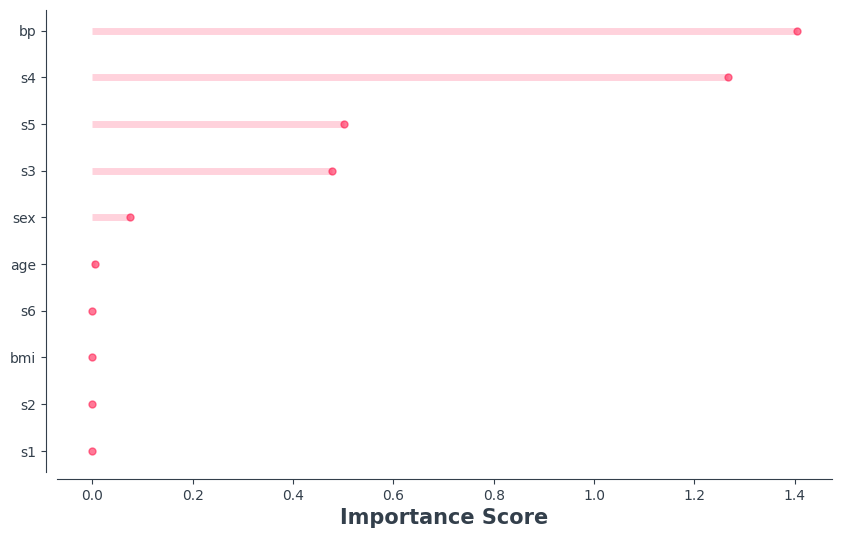

In [2]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

#Sample to be explained
sample_idx = sample_idx[0]

#Generating initial starting point
X_init = np.array([X_test[sample_idx]])

#Initializing the explainer object
f_e = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 5, \
                          normalize=False, importance_method="ARD")

<StemContainer object of 3 artists>

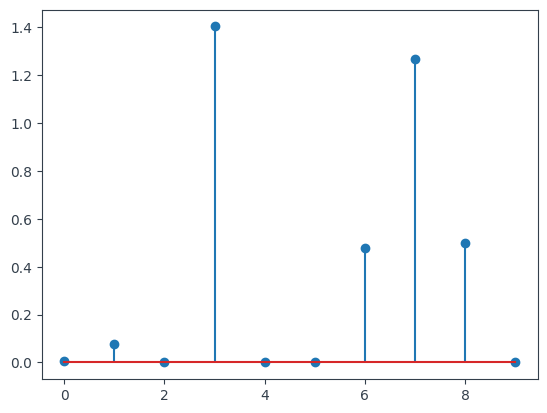

In [3]:
import matplotlib.pyplot as plt
plt.stem(explanation)

In [4]:
print(explanation)

[6.29169320e-03 7.51447862e-02 1.13929703e-04 1.40398272e+00
 6.59370827e-06 7.63976106e-05 4.76942547e-01 1.26746509e+00
 5.00724621e-01 1.17679765e-04]


In [5]:
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
# Generate explantion data for Random Foreall_featuresst
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Class_Feature_Statistics
from project_utils.feature_stats import Classes_Container

UR_Stats = Feature_Statistics(feature_names = features, mode='regresssion')

for test_instance in range(X_test.shape[0]):

    X_init = np.array([X_test[test_instance]])

    UR_explain_inst = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 30, \
                          normalize=False, plot=False, importance_method="ARD")
     
    y_predict = model.predict(X_init)

    print('INSTANCE: ', test_instance)
    
    UR_Stats.Add_Sample(sample     = UR_explain_inst,
                        outcome    = y_test[test_instance],
                        prediction = y_predict)
    

    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44


In [7]:
UR_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

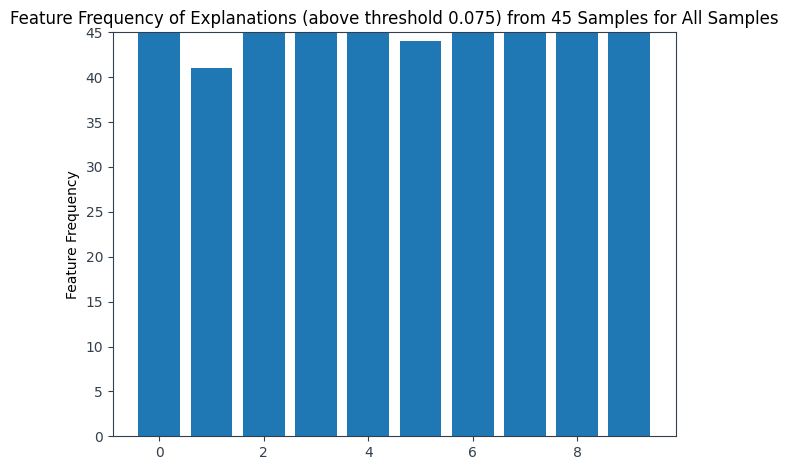

1 -      age
2 -      sex
3 -      bmi
4 -      bp
5 -      s1
6 -      s2
7 -      s3
8 -      s4
9 -      s5
10 -     s6


In [8]:
UR_Stats.Frequency_Plot(top_features=False, display_feature_list=True)

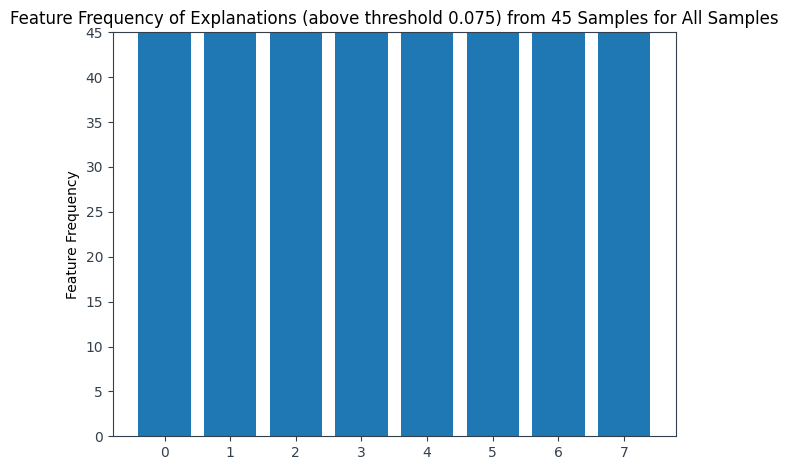

1 -      age
2 -      bmi
3 -      bp
4 -      s1
5 -      s3
6 -      s4
7 -      s5
8 -      s6


In [9]:
UR_Stats.Frequency_Plot(display_feature_list=True)

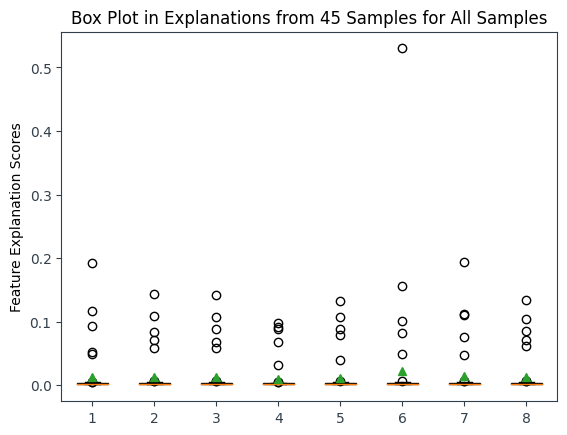

1 -      age
2 -      bmi
3 -      bp
4 -      s1
5 -      s3
6 -      s4
7 -      s5
8 -      s6


In [10]:
UR_Stats.Box_Plot()

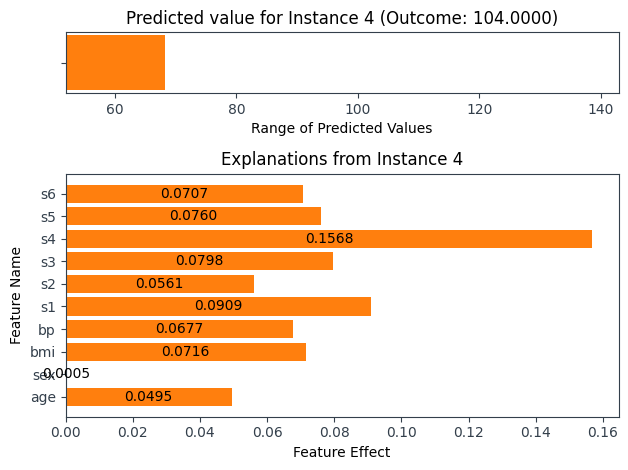

In [11]:
UR_Stats.View_Explanation(instance=4, max_features=10)

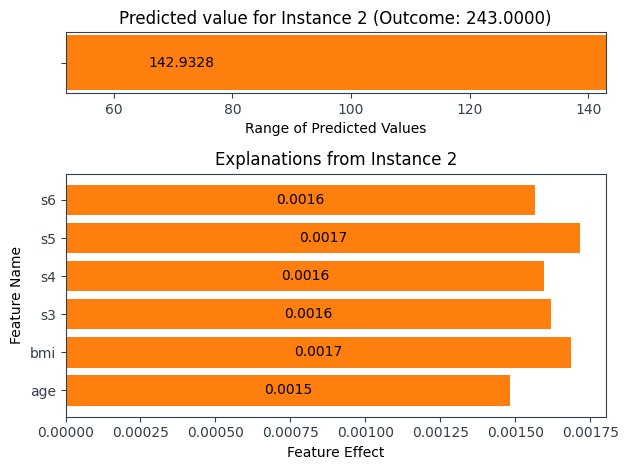

In [12]:
UR_Stats.View_Explanation(instance=2, max_features=6)

In [13]:
from project_utils.feature_stats import Regression_Container

reg_container = Regression_Container(UR_Stats, 5)

In [14]:
reg_container.Feature_Counts(max_features=11, scaled=True, threshold=0.075)


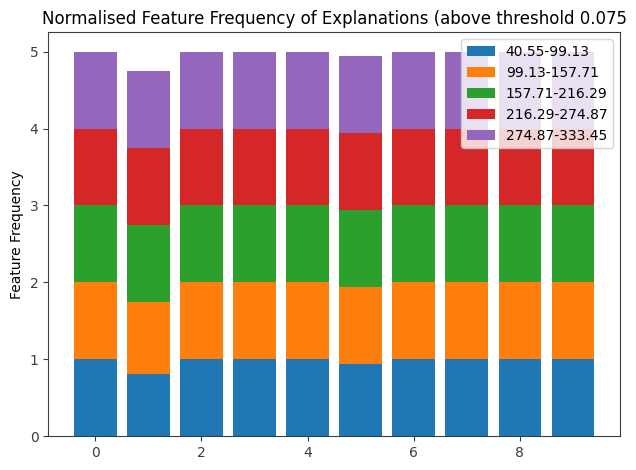

1 -      age
2 -      sex
3 -      bmi
4 -      bp
5 -      s1
6 -      s2
7 -      s3
8 -      s4
9 -      s5
10 -     s6


In [15]:
reg_container.Frequency_Plot()
